In [1]:
# # zip the file
# import zipfile
# zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Processed Data/dataset_v1.1.zip", 'r')
# zip_ref.extractall("/content/gdrive/MyDrive/Processed Data/dataset")
# zip_ref.close()

In [2]:
import sys, os

# if 'google.colab' in sys.modules:
#     # mount google drive
#     from google.colab import drive
#     drive.mount('/content/gdrive')
#     # file_name = 'dataset_v1.1.zip'
#     path_to_file = '/content/gdrive/MyDrive/CS5242 Project/dataset'
#     print(path_to_file)

# local
path_to_file = '../dog_dataset'

In [3]:
# py_file_location = "/content/gdrive/MyDrive/Processed Data/dataset/dataset_v1.1"
# sys.path.append(os.path.abspath(py_file_location))

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import time
import utils
import os
import pandas as pd
import sys


In [5]:
train_data=torch.load(path_to_file+'/train_data_final.pt')
train_label=torch.load(path_to_file+'/train_label_final.pt')
test_data=torch.load(path_to_file+'/test_data_final.pt')
test_label=torch.load(path_to_file+'/test_label_final.pt')

In [6]:
print(train_data.size())
print(test_data.size())

torch.Size([979, 3, 64, 64])
torch.Size([100, 3, 64, 64])


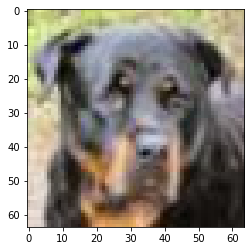

tensor(6)

In [7]:
utils.show(train_data[5])
train_label[5]

In [8]:
mean= train_data.mean()
print(mean)
std= train_data.std()
print(std)

tensor(0.4272)
tensor(0.2518)


In [9]:
class VGG_convnet(nn.Module):

    def __init__(self):

        super(VGG_convnet, self).__init__()

        # block 1:         3 x 64 x 64 --> 64 x 32 x 32        
        self.conv1a = nn.Conv2d(3,   64,  kernel_size=3, padding=1 )
        # self.conv1b = nn.Conv2d(64,  64,  kernel_size=3, padding=1 )
        self.pool1  = nn.MaxPool2d(2,2)

        # block 2:         64 x 32 x 32 --> 128 x 16 x 16
        self.conv2a = nn.Conv2d(64,  128, kernel_size=3, padding=1 )
        # self.conv2b = nn.Conv2d(128, 128, kernel_size=3, padding=1 )
        self.pool2  = nn.MaxPool2d(2,2)

        # block 3:         128 x 16 x 16 --> 256 x 8 x 8        
        self.conv3a = nn.Conv2d(128, 256, kernel_size=3, padding=1 )
        # self.conv3b = nn.Conv2d(256, 256, kernel_size=3, padding=1 )
        self.pool3  = nn.MaxPool2d(2,2)
        
        #block 4:          256 x 8 x 8 --> 512 x 4 x 4
        self.conv4a = nn.Conv2d(256, 512, kernel_size=3, padding=1 )
        self.pool4  = nn.MaxPool2d(2,2)

        #block 5:          512 x 4 x 4 --> 512 x 2 x 2
        self.conv5a = nn.Conv2d(512, 512, kernel_size=3, padding=1 )
        self.pool5  = nn.MaxPool2d(2,2)

        # linear layers:   512 x 2 x 2 --> 32768 --> 4096 --> 4096 --> 10
        self.linear1 = nn.Linear(2048, 4096)
        self.linear2 = nn.Linear(4096,4096)
        self.linear3 = nn.Linear(4096, 10)


    def forward(self, x):

        # block 1:         3 x 32 x 32 --> 64 x 16 x 16
        x = self.conv1a(x)
        x = torch.relu(x)
        # x = self.conv1b(x)
        # x = torch.relu(x)
        x = self.pool1(x)

        # block 2:         64 x 16 x 16 --> 128 x 8 x 8
        x = self.conv2a(x)
        x = torch.relu(x)
        # x = self.conv2b(x)
        # x = torch.relu(x)
        x = self.pool2(x)

        # block 3:         128 x 8 x 8 --> 256 x 4 x 4
        x = self.conv3a(x)
        x = torch.relu(x)
        # x = self.conv3b(x)
        # x = torch.relu(x)
        x = self.pool3(x)

        #block 4:          256 x 4 x 4 --> 512 x 2 x 2
        x = self.conv4a(x)
        x = torch.relu(x)
        x = self.pool4(x)

        #block 5:          256 x 4 x 4 --> 256 x 2 x 2
        x = self.conv5a(x)
        x = torch.relu(x)
        x = self.pool5(x)

        # linear layers:   512 x 2 x 2 --> 2048 --> 4096 --> 4096 --> 10
        x = x.view(-1, 2048)
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        x = torch.relu(x)
        x = self.linear3(x) 
        
        return x

In [10]:
net = VGG_convnet()
print(net)
utils.display_num_param(net)

VGG_convnet(
  (conv1a): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2a): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3a): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4a): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5a): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=2048, out_features=4096, bias=True)
  (linear2): Linear(in_features=4096, out_features=4096, bias=True)
  (linear3): Linear(in_fe

In [11]:
# class LeNet5_convnet(nn.Module):

#     def __init__(self):

#         super(LeNet5_convnet, self).__init__()

#         # CL1:   3 x 64 x 64  -->    50 x 64 x 64 
#         self.conv1 = nn.Conv2d(3,   50,  kernel_size=3,  padding=1 )
        
#         # MP1: 50 x 64 x 64 -->    50 x 32 x 32
#         self.pool1  = nn.MaxPool2d(2,2)
        
#         # CL2:   50 x 32 x 32  -->    100 x 32 x 32 
#         self.conv2 = nn.Conv2d(50,  100,  kernel_size=3,  padding=1 )
        
#         # MP2: 100 x 32 x 32 -->    100 x 16 x 16
#         self.pool2 = nn.MaxPool2d(2,2)
        
#         # LL1:   100 x 7 x 7 = 4900 -->  100 
#         self.linear1 = nn.Linear(25600, 100)
        
#         # LL2:   100  -->  10 
#         self.linear2 = nn.Linear(100,10)


#     def forward(self, x):

#         # CL1:   28 x 28  -->    50 x 28 x 28 
#         x = self.conv1(x)
#         x = F.relu(x)
        
#         # MP1: 50 x 28 x 28 -->    50 x 14 x 14
#         x = self.pool1(x)
        
#         # CL2:   50 x 14 x 14  -->    100 x 14 x 14
#         x = self.conv2(x)
#         x = F.relu(x)
        
#         # MP2: 100 x 14 x 14 -->    100 x 7 x 7
#         x = self.pool2(x)

#         # LL1:   100 x 7 x 7 = 4900  -->  100 
#         x = x.view(-1, 25600)
#         x = self.linear1(x)
#         x = F.relu(x)
        
#         # LL2:   4900  -->  10 
#         x = self.linear2(x)
    
#         return x

In [12]:
# net = LeNet5_convnet()
# print(net)
# utils.display_num_param(net)

In [13]:
# device= torch.device("cuda")
device= torch.device("cpu")
print(device)

cpu


In [14]:
net = net.to(device)

mean = mean.to(device)

std = std.to(device)

In [15]:
criterion = nn.CrossEntropyLoss()
my_lr= 0.01
bs= 5

In [16]:
def eval_on_test_set():

    running_error=0
    num_batches=0

    for i in range(0,100,bs):

        minibatch_data =  test_data[i:i+bs]
        minibatch_label= test_label[i:i+bs]

        minibatch_data=minibatch_data.to(device)
        minibatch_label=minibatch_label.to(device)
        
        inputs = (minibatch_data - mean)/std
        # inputs = minibatch_data

        scores=net( inputs ) 

        error = utils.get_error( scores , minibatch_label)

        running_error += error.item()

        num_batches+=1

    total_error = running_error/num_batches
    print( 'error rate on test set =', total_error*100 ,'percent')

In [ ]:
start=time.time()

for epoch in range(1,100):
    
    # divide the learning rate by 2 at epoch 10, 14 and 18
    if epoch == 5: 
      my_lr = my_lr/2
    
    # create a new optimizer at the beginning of each epoch: give the current learning rate.   
    optimizer=torch.optim.SGD( net.parameters() , lr=my_lr )
        
    # set the running quatities to zero at the beginning of the epoch
    running_loss=0
    running_error=0
    num_batches=0
    
    # set the order in which to visit the image from the training set
    shuffled_indices=torch.randperm(979)
 
    for count in range(0,979,bs):
    
        # Set the gradients to zeros
        optimizer.zero_grad()
        
        # create a minibatch       
        indices=shuffled_indices[count:count+bs]
        minibatch_data =  train_data[indices]
        minibatch_label=  train_label[indices]
        
        # send them to the gpu
        minibatch_data=minibatch_data.to(device)
        minibatch_label=minibatch_label.to(device)
        
        # normalize the minibatch (this is the only difference compared to before!)
        inputs = (minibatch_data - mean)/std
        # inputs = minibatch_data
        
        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()

        # forward the minibatch through the net 
        # scores=net( inputs ) 
        scores=net( inputs )

        # Compute the average of the losses of the data points in the minibatch
        loss =  criterion( scores , minibatch_label) 
        
        # backward pass to compute dL/dU, dL/dV and dL/dW   
        loss.backward()

        # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
        optimizer.step()
        

        # START COMPUTING STATS
        
        # add the loss of this batch to the running loss
        running_loss += loss.detach().item()
        
        # compute the error made on this batch and add it to the running error       
        error = utils.get_error( scores.detach() , minibatch_label)
        running_error += error.item()
        
        num_batches+=1        
    
    
    # compute stats for the full training set
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed = (time.time()-start)/60
    
    if epoch%10 == 9:
        print('epoch=',epoch, '\t time=', elapsed,'min','\t lr=', my_lr  ,'\t loss=', total_loss , '\t error=', total_error*100 ,'percent')
        eval_on_test_set() 
        print(' ')

/Users/abby/miniconda3/envs/deeplearn_course/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459064158/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch= 9 	 time= 7.13235506216685 min 	 lr= 0.005 	 loss= 2.2838381054450054 	 error= 85.53571497299232 percent
error rate on test set = 87.00000047683716 percent
 
epoch= 19 	 time= 14.95088833173116 min 	 lr= 0.005 	 loss= 1.8782197845225432 	 error= 70.20408246590166 percent
error rate on test set = 81.00000083446503 percent
 
epoch= 29 	 time= 22.782115244865416 min 	 lr= 0.005 	 loss= 1.3831199391611986 	 error= 49.36224477631705 percent
error rate on test set = 56.99999988079071 percent
 
epoch= 39 	 time= 30.614736545085908 min 	 lr= 0.005 	 loss= 0.4380132115650352 	 error= 14.923468688312841 percent
error rate on test set = 65.00000029802322 percent
 
epoch= 49 	 time= 38.449330695470174 min 	 lr= 0.005 	 loss= 0.0012296137392857937 	 error= 0.0 percent
error rate on test set = 54.00000035762786 percent
 
epoch= 59 	 time= 46.2229061961174 min 	 lr= 0.005 	 loss= 0.0004610865169534194 	 error= 0.0 percent
error rate on test set = 53.00000041723252 percent
 
epoch= 69 	 time= 5

In [ ]:
# choose a picture at random
idx=randint(0, 100)
im=test_data[idx]
print(test_label[idx])

# diplay the picture
utils.show(im)

# send to device, rescale, and view as a batch of 1 
im = im.to(device)
im= (im-mean) / std
im=im.view(3,64,64).unsqueeze(dim=0)

# feed it to the net and display the confidence scores
scores =  net(im) 
probs= F.softmax(scores, dim=1)
utils.show_prob_mnist(probs.cpu())

In [ ]:
dog_dict = {
    'affenpinscher':0,
    'beagle':1,
    'boxer':2,
    'chihuahua':3,
    'frenchbulldog':4,
    'goldenretriever':5,
    'rottweiler':6,
    'schnauzer':7,
    'sheepdog':8,
    'spaniel':9
}